Demonstrate standard major axis (SMA) fitting

We will compare how two statistical fitting procedures compare to each other in the presence of noise and outliers.
The two methods are Standard Major Axis (SMA) and Ordinary Least Squares (OLS) regression

Steps
1. Generate some synthetic data from a known model
2. Add noise
3. Fit the noisy data with two methods
4. Print and visualize the results

In [1]:
import sys
sys.path.append('/Users/cdholmes/pylib')

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from smafit import smafit
import statsmodels.formula.api as smf
import proplot

In [37]:
# Specify true slope and intercept to use
strue = 2
itrue = 1

# Create 1000 points with specified slope and intercept
# x is normally distributed
n = 1000
xtrue = 3 + np.random.randn(n) 
ytrue = xtrue * strue + itrue

In [133]:
# Noisy versions of x and y

# standard deviation of noise
noise_std = 0.1

# Add noise to x and y
xnoisy = xtrue + np.random.randn(n) * noise_std
ynoisy = ytrue + np.random.randn(n) * noise_std

# Set whether to add outliers or not
add_outliers = True
if add_outliers:
    # Index location of outliers
    idx = np.random.randint(0,n-1,4)
    xnoisy[idx] = xnoisy[idx] + 100 * noise_std
    ynoisy[idx] = ynoisy[idx] + 1000 * noise_std

In [144]:
# SMA fit, use robust methods to minimize effect of outliers
sma_result = smafit( xnoisy, ynoisy, 
                cl=0.95 )
sma_result.keys()

# Robust SMA
rsma_result = smafit( xnoisy, ynoisy, 
                cl=0.95,
                robust=True )

In [145]:
# OLS for comparison
ols_result = smf.ols('y ~ x + 1', {'x':xnoisy, 'y':ynoisy} ).fit()

# standard error of fit parameters
ols_ste_params = np.sqrt( np.diag( ols_result.cov_params() ) )

In [146]:
# Print slope and intercept
fmt = '{:15s}{:8.4f}+/-{:8.4f}'

print('\nParameters')
print('True')
print(fmt.format('slope',       strue, 0))
print(fmt.format('intercept',   itrue, 0))

print('\nOLS')
print(fmt.format('slope',       ols_result.params.iloc[1], ols_ste_params[1] ))
print(fmt.format('intercept',   ols_result.params.iloc[0], ols_ste_params[0] ))

print('\nSMA')
print(fmt.format('slope',       sma_result['slope'],        sma_result['slope_ste']))
print(fmt.format('intercept',   sma_result['intercept'],    sma_result['intercept_ste']))

print('\nRobust SMA')
print(fmt.format('slope',       rsma_result['slope'],        rsma_result['slope_ste']))
print(fmt.format('intercept',   rsma_result['intercept'],    rsma_result['intercept_ste']))


Parameters
True
slope            2.0000+/-  0.0000
intercept        1.0000+/-  0.0000

OLS
slope            4.1455+/-  0.1175
intercept       -5.1413+/-  0.3800

SMA
slope            5.5649+/-  0.1175
intercept       -9.4156+/-  0.3837

Robust SMA
slope            1.9846+/-  0.0071
intercept        1.0416+/-  0.0221


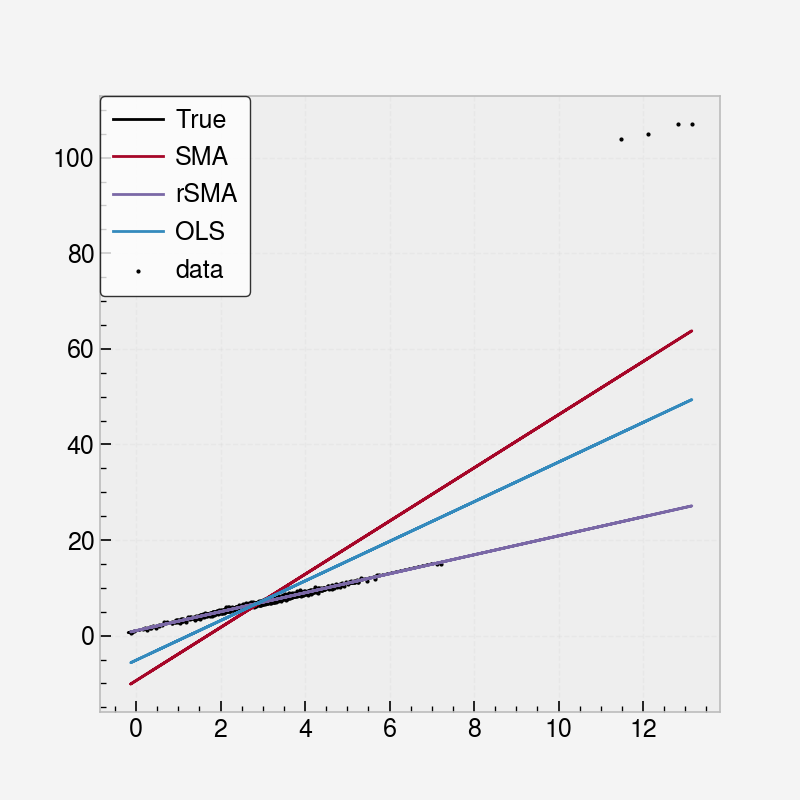

In [152]:
# Plot data & fit lines

# Noisy data
plt.scatter( xnoisy, ynoisy, 
            s=1, color='black', label='Noisy data') 
# True relationship
plt.plot( xtrue, ytrue, 
          color='black', linewidth=1, label='True')

# Fitted relationships
plt.plot( xnoisy, sma_result['slope']*xnoisy+sma_result['intercept'],
         color='C1', linewidth=1, label='SMA')
plt.plot( xnoisy, ols_result.fittedvalues.values,
         color='C0', linewidth=1, label='OLS')
if add_outliers:
    plt.plot( xnoisy, rsma_result['slope']*xnoisy+rsma_result['intercept'],
            color='C2', linewidth=1, label='rSMA')

# Legend
plt.legend()